# Basic Concept in Machine Learning

## Supervised learing, unsupervised learning, and reinforcement learning
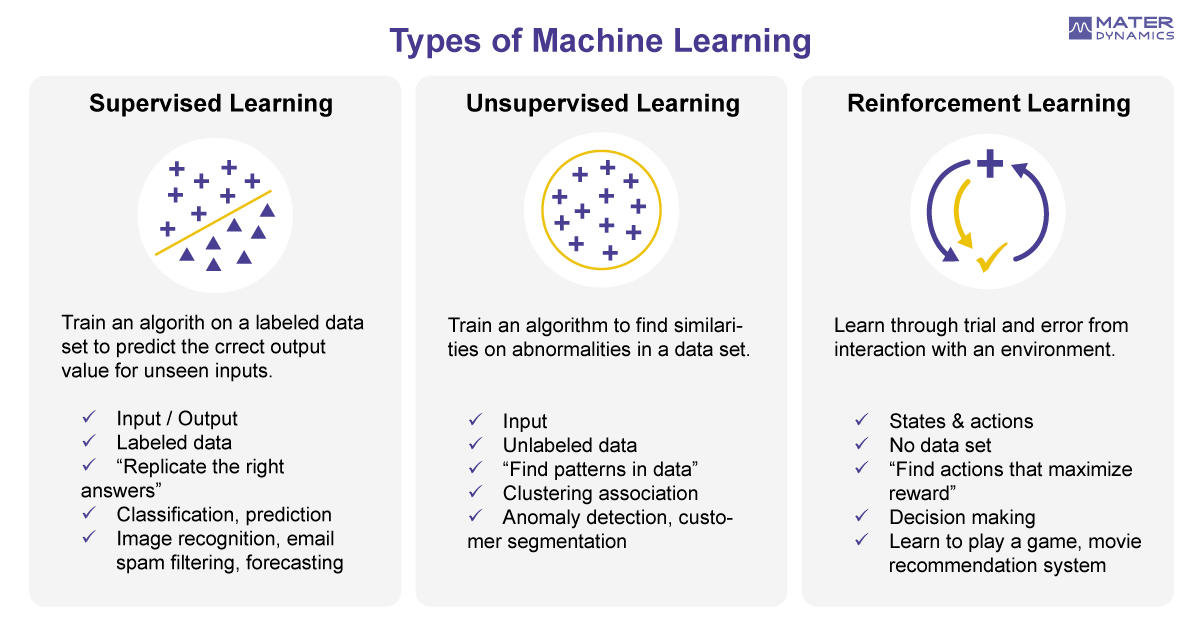

### Supervised learning
The main goal in supervised learning is to learn a model from labeled training data that allows us to
make predictions about unseen or future data.
In supervised learning, we know the right answer (the label or target variable) beforehand when we
train a model.
#### Regression for predicting continuous outcomes
In regression tasks, we're trying to predict a continuous outcome variable - an output that can be any number in a certain range. e.g. predicting the price of a house based on features like its size, location, number of rooms.
#### Classification for predicting class
In classification tasks, we're trying topredict a categorical outcome variable - an output that belongs to a certain class or category. 
If there are more than two categories, we call it a multiclass classification problem. 
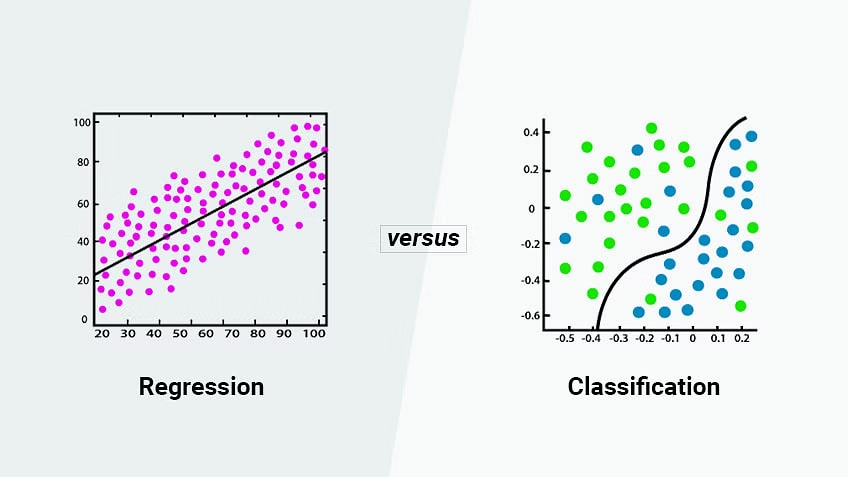

### Reinforcement learning
An agent learns to make decisions by performing certain actions in an environment to achieve a goal. Different with supervised learning, this feedback is not the correct ground truth label or value, but a
measure of how well the action was measured by a reward function.
- State: The state represents the current situation of the agent in the environment. An agent's action in a given state leads to a transition to a new state.
- Reward: A reward is the feedback that the agent receives after taking an action in a particular state. It's a signal that tells the agent how well it's doing. 
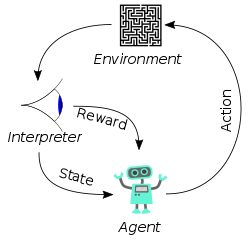

### Unsupervised learning
The algorithm is not given any explicit instructions or correct answers. Instead, it has to figure out patterns and relationships in the data on its own.

#### Clustering
The goal is to identify groups, or clusters, of similar data points in the dataset. 
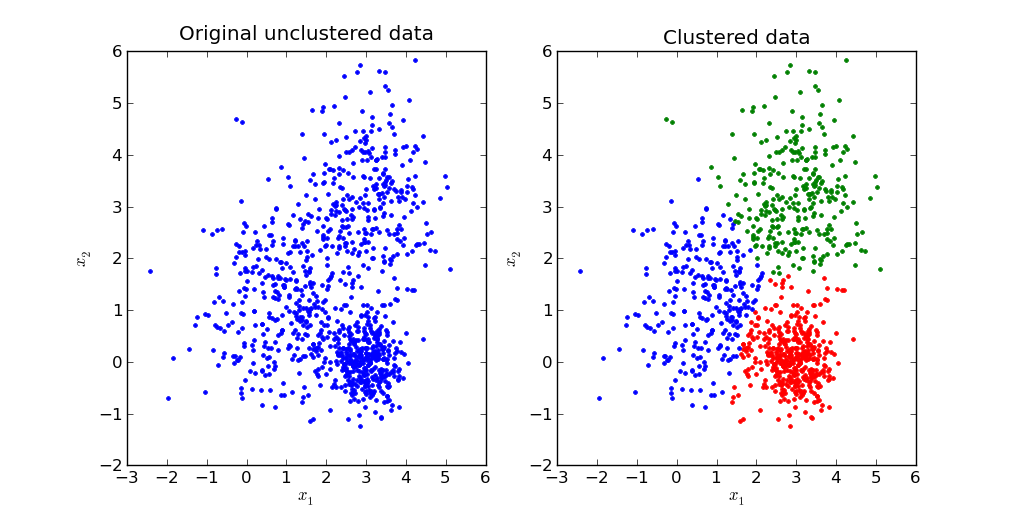

#### Dimensionality reduction
Dimensionality reduction is about simplifying data without losing too much information, aim to reduce the number of features to a manageable level while preserving as much of the useful information as possible. 
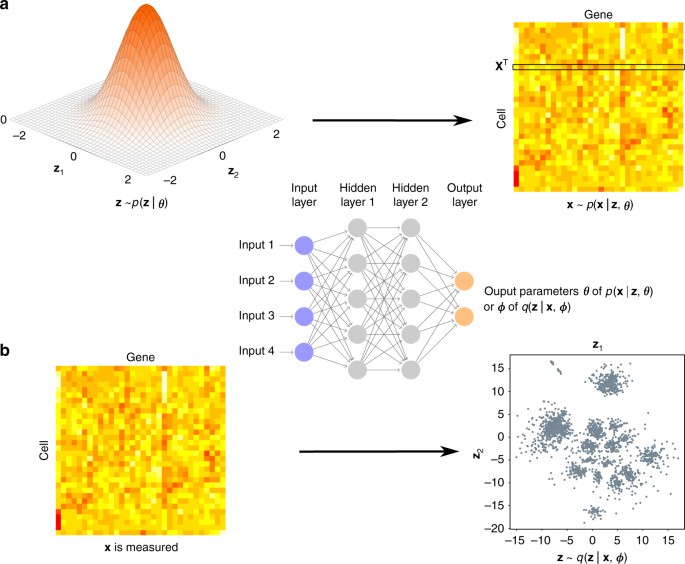

## Terminology and Notations
For a dataset, consisting of 150 samples and four features. can be written as a 150x4 matrix, denoted as $\textbf{x}\in \mathbb{R}^{150\times 4}$:
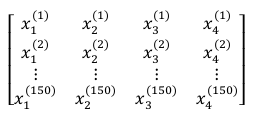

## Roadmap for building Machine learning Systems
A pipeline is a sequence of data processing steps that include data preprocessing, model training, and evaluation
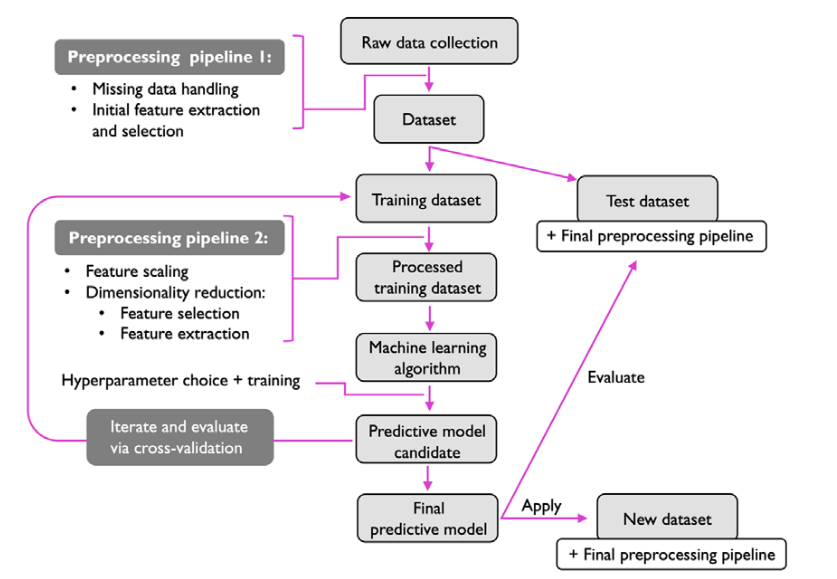

# Classification Algorithms

## Artificial neurons
1. Inputs: The neuron receives multiple inputs, represented as $x_1, x_2, ..., x_n$.
2. Weights: Each input has a corresponding weight. These weights, represented as $w_1, w_2, ..., w_n$
3. Weighted Sum: The neuron calculates the weighted sum $z$ of the inputs:$${z} = \sum_{i=1}^{n} w_i \cdot x_i$$
4. Bias: The bias, represented as $b$, is an additional parameter that allows the neuron to adjust its output independently of its inputs.
5. Adding Bias to the Weighted Sum: The bias is added to the weighted sum, as shown in the equation:
$${z_{bias}} = \sum_{i=1}^{n} w_i \cdot x_i + b$$
6. Activation Function: The result from step 5 is passed through an activation function, $f$, can be represented as:
$$y = f\left(\sum_{i=1}^{n} w_i \cdot x_i + b\right)$$
7. Output: The output of the activation function, $y$, is the final output of the neuron. 
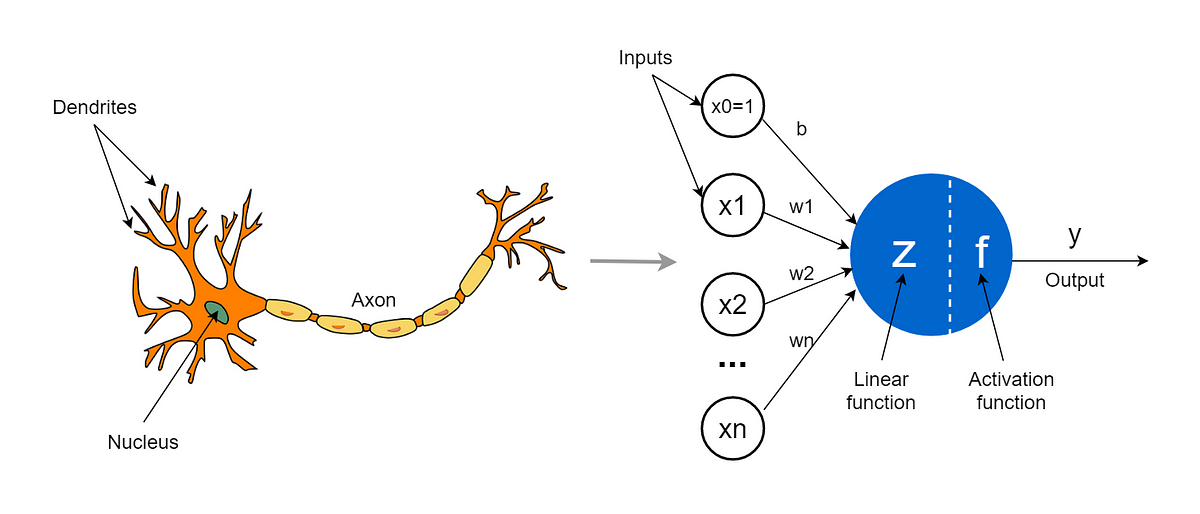

## Perceptron
The perceptron learning rule is an algorithm for training a single-layer perceptron, which is a simple type of neural network. 
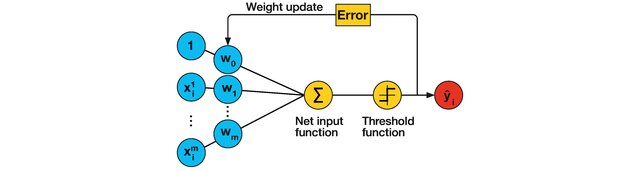

Here's how the perceptron learning rule works:

1. Initialization: We initialize the weights $w_1, w_2, ..., w_n$ and bias $b$ with small random values.

2. For each training example $\textbf{x} = (x_1, x_2, ..., x_n)$ and its corresponding output $y_{\text{true}}$ in the training set, we compute its predicted value:
$$y_{\text{pred}}= \sum_{i=1}^{n} w_i \cdot x_i + b$$
- if $y_{\text{pred}}$ is equal to $y_{\text{true}}$, then our weights are good for this input, and we move to the next training set;
- if $y_{\text{pred}}$ is not equal to $y_{\text{true}}$, then we need to update the weights and bias using the perceptron learning rule.

3. To update the weights and bias simultaneously, we can 
- Update each weight $w_i$ using the formula:
$$ w_i = w_i + \text{{learning_rate}} \cdot (y_{\text{true}} - y_{\text{pred}}) \cdot x_i $$
- Update the bias $b$ using the formula:
$$ b = b + \text{{learning_rate}} \cdot (y_{\text{true}} - y_{\text{pred}}) $$
- The 'learning rate' is typically a constant between 0.0 and 1.0

4. Repeat the process: Continue iterating over the training samples, updating the weights and bias each time the perceptron makes an incorrect prediction. This process is usually repeated many times (or "epochs") to allow the perceptron to learn from all the training samples.

5. End:The algorithm stops when the perceptron correctly classifies all the training samples, or after a set number of epochs.

6. Limitation: It is important to note that the convergence of the perceptron is only guaranteed if the two classes are linearly separable.

7. One-versus-all: The preceptron algorithm is a binary classifier, but it can be extended to multi-class classification with e.g. one-versus-all (OvA) technique

## Adaptive linear neurons
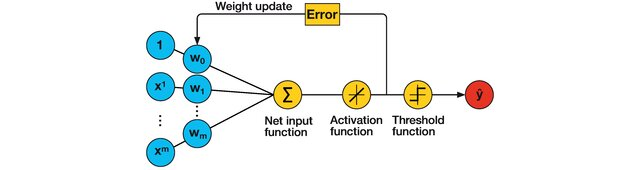
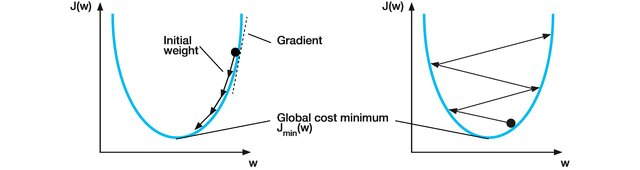

In [29]:
import numpy as np

# define a class for perceptron
class Perceptron:
    """Perceptron learning rule
    
    Parameters
    ------------
    eta : float
      How much we adjust the model in response to the estimated error each time the model weights get updated.
    n_iter : int
      The number of times we run through the training data while updating the model.
    random_state : int
      Used to get consistent random numbers. Makes our work reproducible.

    Attributes
    -----------
    w_ : 1d-array
      These are the weights the model learned for each feature after training.
    b_ : Scalar
      This is an extra weight that isn't associated with a specific feature. It lets the model fit the data better.
    errors_ : list
      This list keeps track of how many errors the model made in each round of training over the data.
    
    """
    
    # Initializer attributes without check
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1, threshold = 0.0):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        self.threshold = threshold
        
    def fit(self, X, y):
        """
        Teach the model using the training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          This is the training data. Each row is an example and each column is a feature.
        y : array-like, shape = [n_examples]
          This is what we want the model to predict. There's one per example in X.

        Returns
        -------
        self : object
          The model itself. This lets us use the model right after training it.
        """
        rgen = np.random.RandomState(self.random_state)
        # the initial weight is small random number from a normal distribution with std 0.01
        # the underscore _ means these attributes are estimated from the data, not provided
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = X.shape[1])
        self.b_ = np.float_(0.)
        self.errors_ = []
        
        # For each pass through the training data 
        for _ in range(self.n_iter):
            errors = 0
            # zip(X, y) is used to pair and iterate each example in the training set with its label. 
            for xi, target in zip(X,y):
                # Find out how much we'd need to change the model
                update = self.eta * (target - self.predict(xi))
                # Change the weights and bias by that amount
                self.w_ = self.w_ + update * xi
                self.b_ = self.b_ + update
                # If we had to change the model, it means some error has been detected
                errors = errors + int(update != 0.0)
            # Keep track the error in each iteration
            self.errors_.append(errors)
        return self
        
    def net_input(self, X):
        """
        For each example in X, find the total of each feature times its weight, plus bias.
        """
        return np.dot(X, self.w_) + self.b_
    
    def predict(self, X):
        """
        For each example in X, say whether the total input puts it in class 1 or class 0.
        """
        return np.where(self.net_input(X) >=self.threshold, 1, 0)
    
    

In [33]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('From URL: ', s)
df = pd.read_csv(s, header = None, encoding = 'utf-8')
df.tail(5)

# Configure label, 0 for setosa and 1 for versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

# Configure features, including 'sepal length' and 'petal length', column 1 and 3
X = df.iloc[0:100, [0,2]].values

# plot with plotly
fig = go.Figure()

# Add Setosa scatter
fig.add_trace(go.Scatter(x=X[:50, 0], y=X[:50, 1],
                    mode='markers',
                    name='Setosa',
                    marker=dict(color='red')))

# Add Versicolor scatter
fig.add_trace(go.Scatter(x=X[50:100, 0], y=X[50:100, 1],
                    mode='markers',
                    name='Versicolor',
                    marker=dict(color='blue')))

# Label axes
fig.update_layout(
    xaxis_title='Sepal length [cm]',
    yaxis_title='Petal length [cm]',
    title='Iris Dataset: Sepal vs Petal length'
)

# Show figure
fig.show()

From URL:  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


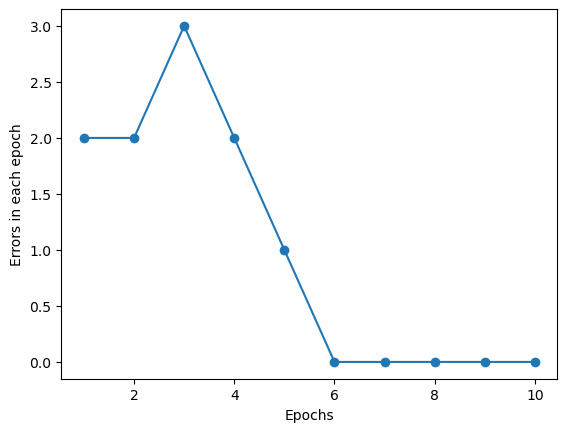

In [34]:
ppn = Perceptron(eta = 0.1, n_iter = 10)
ppn.fit(X,y)
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Errors in each epoch')
plt.show()

In [56]:
import plotly.graph_objects as go
import numpy as np
from sklearn.preprocessing import LabelEncoder

def plot_decision_regions(X, y, classifier, resolution=0.02):
   
    # Convert y to numeric for color scale
    y_numeric = LabelEncoder().fit_transform(y)
   
    # Create a grid of points
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # [xx1, xx2] are matrices representing all the points in the grid.
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    # Flatten the grids into 1D arrays and stack them into a 2D array
    gridPoints = np.array([xx1.ravel(), xx2.ravel()]).T
    
    # Predict classes for all points on the grid
    Z = classifier.predict(gridPoints)
    Z = Z.reshape(xx1.shape)

    # Create the Heatmap for the decision boundary
    heatmap = go.Heatmap(
        z=Z,
        x0=x1_min,
        dx=resolution,
        y0=x2_min,
        dy=resolution,
        opacity=0.3,  # Adjust to change transparency of decision boundary region
        colorscale='Viridis'  # Adjust to change colorscale
    )
    
    # Create the Scatter plot for the actual data points
    scatter = go.Scatter(
        x=X[:, 0],
        y=X[:, 1],
        mode='markers',
        marker=dict(
            size=8,
            color=y_numeric,  # set color to classes
            colorscale='Viridis',  # adjust to change colorscale
            line=dict(width=1, color='Black')
        ),
        text=y,  # to display the class on hover
        hoverinfo='text+x+y'
    )
    
    # Create figure
    fig = go.Figure()

    # Add the heatmap and scatter to the figure
    fig.add_trace(heatmap)
    fig.add_trace(scatter)
    
    # Set labels
    fig.update_layout(
        xaxis_title='Sepal length [cm]',
        yaxis_title='Petal length [cm]',
        showlegend=False  # Hide default legend
    )

    return fig

# Call the function and show the plot
fig = plot_decision_regions(X, y, classifier=ppn)
fig.show()